#Classification of Water Consumption Types

[Assignment SI - Infos](https://drive.google.com/file/d/1lh5a0YxVsC-NXtsIpucTVCrfJR_8KZB4/view?usp=sharing)

[Dataset Train](https://virtual.ipb.pt/access/content/group/5b961040-5442-11ee-bfc7-421e367e2b5a/Assignment/train.csv)

[Dataset Competition](https://virtual.ipb.pt/access/content/group/5b961040-5442-11ee-bfc7-421e367e2b5a/Assignment/competition.csv)

### 1) **IMPORT** and **UTILITY**

Import all usefull libraries and define some usefull functions

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

### 2) **READ DATA FILES**

Read data file uploaded to this google colab

In [ ]:
train = pd.read_csv("train.csv")

In [ ]:
train.shape

(329975, 6)

In [ ]:
train.head()

,Year,Month,Consumer_type,Consumption,Consumer_number,Installation_zone
0,2013,1,domestic,0,MOGV36480546611521,Installation_zone 1
1,2013,1,industrial,5,BECS02817768252637,Installation_zone 2
2,2013,1,domestic,6,VRFW65577141436242,Installation_zone 2
3,2013,1,domestic,1,QLLI18662653137621,Installation_zone 2
4,2013,1,domestic,13,HYUO61823402850645,Installation_zone 2


In [ ]:
train.info

<bound method DataFrame.info of         Year  Month   Consumer_type  Consumption     Consumer_number  \
0       2013      1        domestic            0  MOGV36480546611521   
1       2013      1      industrial            5  BECS02817768252637   
2       2013      1        domestic            6  VRFW65577141436242   
3       2013      1        domestic            1  QLLI18662653137621   
4       2013      1        domestic           13  HYUO61823402850645   
...      ...    ...             ...          ...                 ...   
329970  2020     12        domestic            0  ZSOE03393580274296   
329971  2020     12  rural domestic            0  RVZG94535208799772   
329972  2020     12  rural domestic            0  DWGA69725679861554   
329973  2020     12  rural domestic            0  VJDC45865594518045   
329974  2020     12        domestic           14  MJUV42827152944728   

           Installation_zone  
0        Installation_zone 1  
1        Installation_zone 2  
2        I

In [ ]:
print(train['Consumer_type'].unique())

['domestic' 'industrial' 'rural commercial' 'construction'
 'low income families' 'rural domestic' 'rural expansion']


In [ ]:
domestic_qtd = train['Consumer_type'].value_counts()['domestic']
print(domestic_qtd)

236167


 ### 3) **Pre Processing**

   

In [ ]:
le_ct = LabelEncoder()
le_ct.fit(train['Consumer_type'].unique())

le_iz = LabelEncoder()
le_iz.fit(train['Installation_zone'].unique())

le_cn = LabelEncoder()
le_cn.fit(train['Consumer_number'].unique())

train_le = train

train_le['Consumer_type'] = le_ct.transform(train['Consumer_type'])
train_le['Installation_zone'] = le_iz.transform(train['Installation_zone'])
train_le['Consumer_number'] = le_cn.transform(train['Consumer_number'])

# le_ct.classes_
# print(le_ct.inverse_transform([0, 1, 2, 3, 4, 5, 6]))
# print(le_iz.classes_)
# print(train_le['Installation_zone'].unique())

In [ ]:
train.head()

,Year,Month,Consumer_type,Consumption,Consumer_number,Installation_zone
0,2013,1,1,0,13456,0
1,2013,1,2,5,1273,11
2,2013,1,1,6,23079,11
3,2013,1,1,1,17600,11
4,2013,1,1,13,8598,11


In [ ]:
train_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329975 entries, 0 to 329974
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Year               329975 non-null  int64
 1   Month              329975 non-null  int64
 2   Consumer_type      329975 non-null  int64
 3   Consumption        329975 non-null  int64
 4   Consumer_number    329975 non-null  int64
 5   Installation_zone  329975 non-null  int64
dtypes: int64(6)
memory usage: 15.1 MB


In [ ]:
scaler = MinMaxScaler()

industrial_df = train_le[train_le['Consumer_type'] == 2]
industrial_df = industrial_df.drop('Consumer_type', axis=1)
industrial_train_mms = pd.DataFrame(scaler.fit_transform(industrial_df.values), index=industrial_df.index, columns=industrial_df.columns)

rural_commercial_df = train_le[train_le['Consumer_type'] == 4]
rural_commercial_df = rural_commercial_df.drop('Consumer_type', axis=1)
rural_commercial_train_mms = pd.DataFrame(scaler.fit_transform(rural_commercial_df.values), index=rural_commercial_df.index, columns=rural_commercial_df.columns)

construction_df = train_le[train_le['Consumer_type'] == 0]
construction_df = construction_df.drop('Consumer_type', axis=1)
construction_train_mms = pd.DataFrame(scaler.fit_transform(construction_df.values), index=construction_df.index, columns=construction_df.columns)

low_income_families_df = train_le[train_le['Consumer_type'] == 3]
low_income_families_df = low_income_families_df.drop('Consumer_type', axis=1)
low_income_families_train_mms = pd.DataFrame(scaler.fit_transform(low_income_families_df.values), index=low_income_families_df.index, columns=low_income_families_df.columns)

rural_domestic_df = train_le[train_le['Consumer_type'] == 5]
rural_domestic_df = rural_domestic_df.drop('Consumer_type', axis=1)
rural_domestic_train_mms = pd.DataFrame(scaler.fit_transform(rural_domestic_df.values), index=rural_domestic_df.index, columns=rural_domestic_df.columns)

rural_expansion_df = train_le[train_le['Consumer_type'] == 6]
rural_expansion_df = rural_expansion_df.drop('Consumer_type', axis=1)
rural_expansion_train_mms = pd.DataFrame(scaler.fit_transform(rural_expansion_df.values), index=rural_expansion_df.index, columns=rural_expansion_df.columns)

In [ ]:
import os
import logging
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
# physical_devices = tf.config.list_physical_devices('GPU')

# print("GPU:", tf.config.list_physical_devices('GPU'))
# print("Num GPUs:", len(physical_devices))

# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

In [ ]:
tf.get_logger().setLevel(logging.ERROR)


class Gan():

    def __init__(self, data):

        self.data = data
        self.n_epochs = 2000

    # Genereta random noise in a latent space
    def _noise(self):
        noise = np.random.rand(self.data.shape[0], self.data.shape[1])
        return noise

    def _generator(self):
        model = tf.keras.Sequential(name="Generator_model")
        model.add(tf.keras.layers.Dense(15, activation='relu',
                                        kernel_initializer='he_uniform',
                                        input_dim=self.data.shape[1]))
        model.add(tf.keras.layers.Dense(30, activation='relu'))
        model.add(tf.keras.layers.Dense(
            self.data.shape[1], activation='linear'))
        return model

    def _discriminator(self):
        model = tf.keras.Sequential(name="Discriminator_model")
        model.add(tf.keras.layers.Dense(25, activation='relu',
                                        kernel_initializer='he_uniform',
                                        input_dim=self.data.shape[1]))
        model.add(tf.keras.layers.Dense(50, activation='relu'))
        # sigmoid => real or fake
        model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

        return model

    # define the combined generator and discriminator model,
    # for updating the generator
    def _GAN(self, generator, discriminator):
        discriminator.trainable = False
        generator.trainable = True
        model = tf.keras.Sequential(name="GAN")
        model.add(generator)
        model.add(discriminator)
        model.compile(loss='binary_crossentropy', optimizer='adam')
        return model

    # train the generator and discriminator
    def train(self, generator, discriminator, gan):

        G_losses = []
        D_losses = []

        # determine half the size of one batch, for updating the  discriminator
        # manually enumerate epochs
        for epoch in range(self.n_epochs):

            # Train the discriminator
            generated_data = generator.predict(self._noise())
            labels = np.concatenate([np.ones(self.data.shape[0]), np.zeros(self.data.shape[0])])
            X = np.concatenate([self.data, generated_data])
            discriminator.trainable = True
            d_loss , _ = discriminator.train_on_batch(X, labels)

            # Train the generator
            noise = self._noise()
            g_loss = gan.train_on_batch(noise, np.ones(self.data.shape[0]))

            G_losses.append(g_loss)
            D_losses.append(d_loss)

            print('>%d, D = %f, G = %f' %(epoch+1, d_loss, g_loss))

        return generator, G_losses, D_losses

659/659 [==============================] - 2s 1ms/step
>1, D = 0.645399, G = 0.406375
659/659 [==============================] - 1s 1ms/step
>2, D = 0.631951, G = 0.392576
6723/6723 [==============================] - 11s 2ms/step


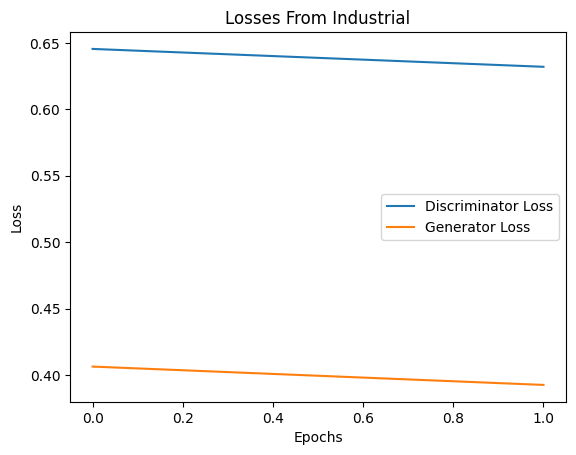

In [ ]:
G = Gan(industrial_train_mms)
gen, G_losses, D_losses = G.train(G._generator(), G._discriminator(), G._GAN(G._generator(), G._discriminator()))

industrial_generated = gen.predict(np.random.rand((domestic_qtd - industrial_train_mms.shape[0]), industrial_train_mms.shape[1]))

plt.title('Losses From Industrial')
plt.plot(range(len(D_losses)), D_losses, label='Discriminator Loss')
plt.plot(range(len(G_losses)), G_losses, label='Generator Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

174/174 [==============================] - 0s 2ms/step
>1, D = 0.749645, G = 0.868392
174/174 [==============================] - 0s 1ms/step
>2, D = 0.733631, G = 0.851317
7208/7208 [==============================] - 11s 1ms/step


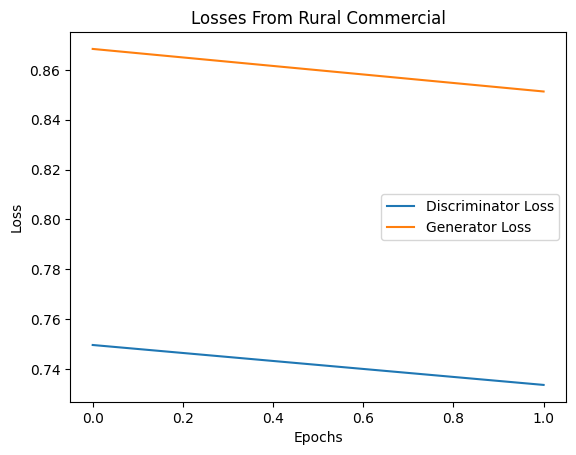

In [ ]:
G = Gan(rural_commercial_train_mms)
gen, G_losses, D_losses = G.train(G._generator(), G._discriminator(), G._GAN(G._generator(), G._discriminator()))

rural_commercial_generated = gen.predict(np.random.rand((domestic_qtd - rural_commercial_train_mms.shape[0]), rural_commercial_train_mms.shape[1]))

plt.title('Losses From Rural Commercial')
plt.plot(range(len(D_losses)), D_losses, label='Discriminator Loss')
plt.plot(range(len(G_losses)), G_losses, label='Generator Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

70/70 [==============================] - 0s 1ms/step
>1, D = 0.301519, G = 0.730226
70/70 [==============================] - 0s 1ms/step
>2, D = 0.296990, G = 0.728505
7311/7311 [==============================] - 11s 2ms/step


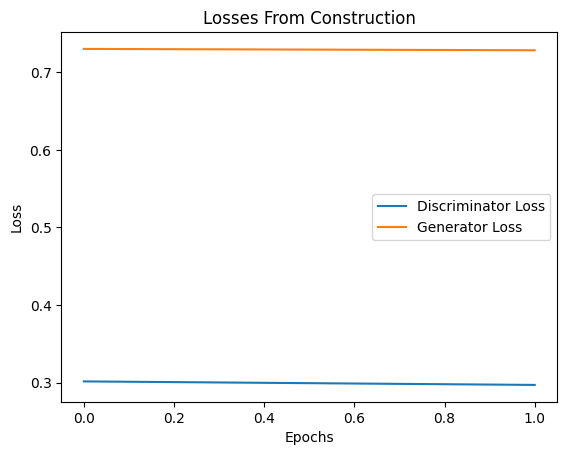

In [ ]:
G = Gan(construction_df)
gen, G_losses, D_losses = G.train(G._generator(), G._discriminator(), G._GAN(G._generator(), G._discriminator()))

construction_generated = gen.predict(np.random.rand((domestic_qtd - construction_df.shape[0]), construction_df.shape[1]))

plt.title('Losses From Construction')
plt.plot(range(len(D_losses)), D_losses, label='Discriminator Loss')
plt.plot(range(len(G_losses)), G_losses, label='Generator Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

32/32 [==============================] - 0s 1ms/step
>1, D = 2320.466797, G = 0.747245
32/32 [==============================] - 0s 1ms/step
>2, D = 2153.870850, G = 0.730064
7349/7349 [==============================] - 12s 2ms/step


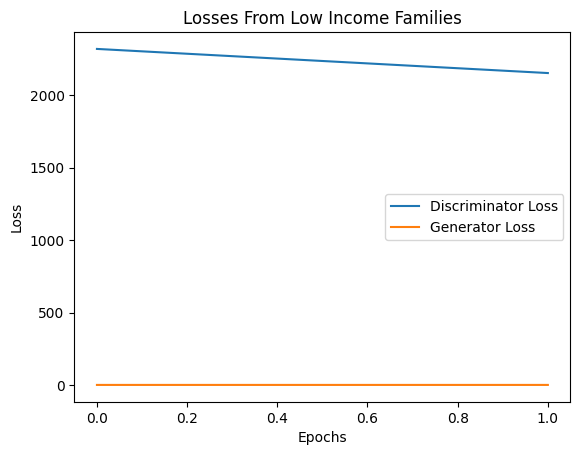

In [ ]:
G = Gan(low_income_families_df)
gen, G_losses, D_losses = G.train(G._generator(), G._discriminator(), G._GAN(G._generator(), G._discriminator()))

low_income_families_generated = gen.predict(np.random.rand((domestic_qtd - low_income_families_df.shape[0]), low_income_families_df.shape[1]))

plt.title('Losses From Low Income Families')
plt.plot(range(len(D_losses)), D_losses, label='Discriminator Loss')
plt.plot(range(len(G_losses)), G_losses, label='Generator Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1972/1972 [==============================] - 3s 2ms/step
>1, D = 0.344564, G = 0.534422
1972/1972 [==============================] - 3s 1ms/step
>2, D = 0.334277, G = 0.525709
5409/5409 [==============================] - 9s 2ms/step


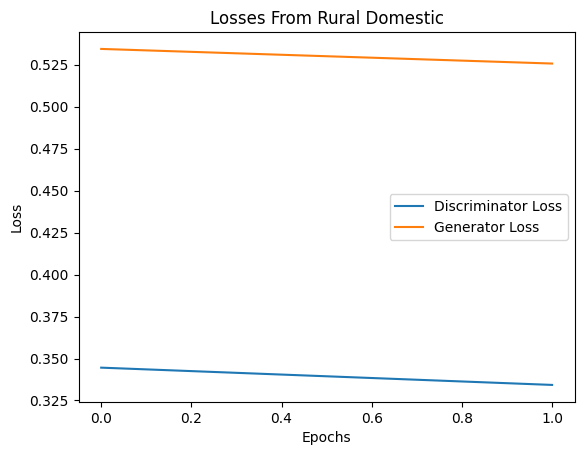

In [ ]:
G = Gan(rural_domestic_df)
gen, G_losses, D_losses = G.train(G._generator(), G._discriminator(), G._GAN(G._generator(), G._discriminator()))

rural_domestic_generated = gen.predict(np.random.rand((domestic_qtd - rural_domestic_df.shape[0]), rural_domestic_df.shape[1]))

plt.title('Losses From Rural Domestic')
plt.plot(range(len(D_losses)), D_losses, label='Discriminator Loss')
plt.plot(range(len(G_losses)), G_losses, label='Generator Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

28/28 [==============================] - 0s 1ms/step
>1, D = 8.690694, G = 0.841641
28/28 [==============================] - 0s 1ms/step
>2, D = 7.608063, G = 0.833899
7353/7353 [==============================] - 17s 2ms/step


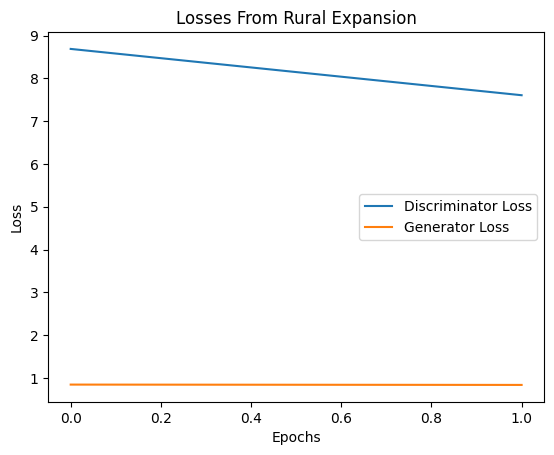

In [ ]:
G = Gan(rural_expansion_df)
gen, G_losses, D_losses = G.train(G._generator(), G._discriminator(), G._GAN(G._generator(), G._discriminator()))

rural_expansion_generated = gen.predict(np.random.rand((domestic_qtd - rural_expansion_df.shape[0]), rural_expansion_df.shape[1]))

plt.title('Losses From Rural Expansion')
plt.plot(range(len(D_losses)), D_losses, label='Discriminator Loss')
plt.plot(range(len(G_losses)), G_losses, label='Generator Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
industrial_generated_df = pd.DataFrame(scaler.inverse_transform(industrial_generated), columns=industrial_train_mms.columns)
industrial_generated_df['Consumer_type'] = 2

rural_commercial_generated_df = pd.DataFrame(scaler.inverse_transform(rural_commercial_generated), columns=rural_commercial_train_mms.columns)
rural_commercial_generated_df['Consumer_type'] = 4

construction_generated_df = pd.DataFrame(scaler.inverse_transform(construction_generated), columns=construction_df.columns)
construction_generated_df['Consumer_type'] = 0

low_income_families_generated_df = pd.DataFrame(scaler.inverse_transform(low_income_families_generated), columns=low_income_families_df.columns)
low_income_families_generated_df['Consumer_type'] = 3

rural_domestic_generated_df = pd.DataFrame(scaler.inverse_transform(rural_domestic_generated), columns=rural_domestic_df.columns)
rural_domestic_generated_df['Consumer_type'] = 5

rural_expansion_generated_df = pd.DataFrame(scaler.inverse_transform(rural_expansion_generated), columns=rural_expansion_df.columns)
rural_expansion_generated_df['Consumer_type'] = 6

generated_df = pd.concat([industrial_generated_df, rural_commercial_generated_df, construction_generated_df, low_income_families_generated_df, rural_domestic_generated_df, rural_expansion_generated_df], axis=0)
generated_df = generated_df.astype('int16').abs()

In [ ]:
generated_df.head()

,Year,Month,Consumption,Consumer_number,Installation_zone,Consumer_type
0,2013,3,6,10455,5,2
1,2010,4,86,18184,19,2
2,2013,1,33,11695,3,2
3,2011,1,22,16178,4,2
4,2012,0,20,9885,5,2


In [ ]:
generated_df['Consumer_type'] = le_ct.inverse_transform(generated_df['Consumer_type'])

generated_df = generated_df[generated_df['Installation_zone'].isin(le_iz.transform(le_iz.classes_))]
generated_df['Installation_zone'] = le_iz.inverse_transform(generated_df['Installation_zone'])

generated_df_with_new_consumer_numbers = generated_df[~generated_df['Consumer_number'].isin(le_cn.classes_)]

generated_df = generated_df[generated_df['Consumer_number'].isin(le_cn.classes_)]
generated_df['Consumer_number'] = le_cn.inverse_transform(generated_df['Consumer_number'])

<ipython-input-25-f82f9c6d2b1f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_df['Installation_zone'] = le_iz.inverse_transform(generated_df['Installation_zone'])


In [ ]:
generated_df.head()

,Year,Month,Consumption,Consumer_number,Installation_zone,Consumer_type


In [ ]:
generated_df_with_new_consumer_numbers.head()

,Year,Month,Consumption,Consumer_number,Installation_zone,Consumer_type
0,2013,3,6,10455,Installation_zone 14,industrial
1,2010,4,86,18184,Installation_zone 27,industrial
2,2013,1,33,11695,Installation_zone 12,industrial
3,2011,1,22,16178,Installation_zone 13,industrial
4,2012,0,20,9885,Installation_zone 14,industrial


In [ ]:
generated_df.shape

(0, 6)

In [ ]:
generated_df_with_new_consumer_numbers.shape

(1323128, 6)

In [ ]:
import random
import string

def generate_consumer_number(consumer_number):
    random_part_1 = ''.join(random.choices(string.ascii_uppercase, k=4))
    random_part_2 = ''.join(random.choices(string.digits, k=16))
    consumer_number = random_part_1 + random_part_2
    return consumer_number

In [ ]:
generated_df_with_new_consumer_numbers['Consumer_number'] = generated_df_with_new_consumer_numbers['Consumer_number'].apply(generate_consumer_number)

In [ ]:
generated_df_with_new_consumer_numbers.head()

,Year,Month,Consumption,Consumer_number,Installation_zone,Consumer_type
0,2013,3,6,QJPR9678874312230492,Installation_zone 14,industrial
1,2010,4,86,JCGU7387854438086345,Installation_zone 27,industrial
2,2013,1,33,FIFU1710411007778165,Installation_zone 12,industrial
3,2011,1,22,HLFQ2402670234143693,Installation_zone 13,industrial
4,2012,0,20,PHUS2089313600070764,Installation_zone 14,industrial


In [ ]:
train = pd.read_csv("train.csv")

new_train = pd.concat([train, generated_df_with_new_consumer_numbers, generated_df], axis=0)

In [ ]:
new_train.head()

,Year,Month,Consumer_type,Consumption,Consumer_number,Installation_zone
0,2013,1,domestic,0,MOGV36480546611521,Installation_zone 1
1,2013,1,industrial,5,BECS02817768252637,Installation_zone 2
2,2013,1,domestic,6,VRFW65577141436242,Installation_zone 2
3,2013,1,domestic,1,QLLI18662653137621,Installation_zone 2
4,2013,1,domestic,13,HYUO61823402850645,Installation_zone 2


In [ ]:
new_train.shape

(1653103, 6)

In [ ]:
# new_train.to_csv('new_train_v1.csv', sep=',', index=False)

In [ ]:
train = pd.read_csv("train.csv")
new_train = pd.read_csv("new_train_v1.csv")

train.shape

(329975, 6)

In [ ]:
new_train.shape

(1454642, 6)

In [ ]:
print(train['Consumer_type'].unique())

print(train['Consumer_type'].value_counts()['domestic'])
print(train['Consumer_type'].value_counts()['industrial'])
print(train['Consumer_type'].value_counts()['rural commercial'])
print(train['Consumer_type'].value_counts()['construction'])
print(train['Consumer_type'].value_counts()['low income families'])
print(train['Consumer_type'].value_counts()['rural domestic'])
print(train['Consumer_type'].value_counts()['rural expansion'])

['domestic' 'industrial' 'rural commercial' 'construction'
 'low income families' 'rural domestic' 'rural expansion']
236167
21057
5541
2235
999
63086
890


In [ ]:
print(new_train['Consumer_type'].unique())

print(new_train['Consumer_type'].value_counts()['domestic'])
print(new_train['Consumer_type'].value_counts()['industrial'])
print(new_train['Consumer_type'].value_counts()['rural commercial'])
print(new_train['Consumer_type'].value_counts()['construction'])
print(new_train['Consumer_type'].value_counts()['low income families'])
print(new_train['Consumer_type'].value_counts()['rural domestic'])
print(new_train['Consumer_type'].value_counts()['rural expansion'])

['domestic' 'rural domestic' 'industrial' 'rural commercial'
 'construction' 'low income families' 'rural expansion']
235667
235667
235667
40640
235667
235667
235667


In [ ]:
test_1 = train[train['Consumer_type'] == 'domestic'].head(500)
test_2 = train[train['Consumer_type'] == 'industrial'].head(500)
test_3 = train[train['Consumer_type'] == 'rural commercial'].head(500)
test_4 = train[train['Consumer_type'] == 'construction'].head(500)
test_5 = train[train['Consumer_type'] == 'low income families'].head(500)
test_6 = train[train['Consumer_type'] == 'rural domestic'].head(500)
test_7 = train[train['Consumer_type'] == 'rural expansion'].head(500)

test = pd.concat([test_1, test_2, test_3, test_4, test_5, test_6, test_7], axis=0)

In [ ]:
test.shape

(3500, 6)

In [ ]:
# Merge DataFrames and identify the rows that are equal
merged_df = pd.merge(test, new_train, how='inner', indicator=True)

# Count the number of rows that are equal
num_equal_rows = len(merged_df[merged_df['_merge'] == 'both'])

print(num_equal_rows)

0


In [ ]:
# Merge DataFrames and identify the rows present in both
merged_df = pd.merge(new_train, test, how='outer', indicator=True)

# Filter out rows that exist in the second DataFrame
new_train = merged_df[merged_df['_merge'] == 'left_only'].drop(columns=['_merge'])

In [ ]:
# Merge DataFrames and identify the rows that are equal
merged_df = pd.merge(test, new_train, how='inner', indicator=True)

# Count the number of rows that are equal
num_equal_rows = len(merged_df[merged_df['_merge'] == 'both'])

print(num_equal_rows)

0


In [ ]:
new_train.shape

(1454642, 6)

In [ ]:
test.shape

(3500, 6)

In [ ]:
print(new_train['Consumer_type'].unique())

print(new_train['Consumer_type'].value_counts()['domestic'])
print(new_train['Consumer_type'].value_counts()['industrial'])
print(new_train['Consumer_type'].value_counts()['rural commercial'])
print(new_train['Consumer_type'].value_counts()['construction'])
print(new_train['Consumer_type'].value_counts()['low income families'])
print(new_train['Consumer_type'].value_counts()['rural domestic'])
print(new_train['Consumer_type'].value_counts()['rural expansion'])

['domestic' 'rural domestic' 'industrial' 'rural commercial'
 'construction' 'low income families' 'rural expansion']
235667
235667
235667
40640
235667
235667
235667


In [ ]:
print(test['Consumer_type'].unique())

print(test['Consumer_type'].value_counts()['domestic'])
print(test['Consumer_type'].value_counts()['industrial'])
print(test['Consumer_type'].value_counts()['rural commercial'])
print(test['Consumer_type'].value_counts()['construction'])
print(test['Consumer_type'].value_counts()['low income families'])
print(test['Consumer_type'].value_counts()['rural domestic'])
print(test['Consumer_type'].value_counts()['rural expansion'])

['domestic' 'industrial' 'rural commercial' 'construction'
 'low income families' 'rural domestic' 'rural expansion']
500
500
500
500
500
500
500


In [ ]:
new_train.to_csv('new_train_v1.csv', sep=',', index=False)
test.to_csv('test_v1.csv', sep=',', index=False)